# 1. Introduction

## 1.1 Background
Pertumbuhan populasi dunia merupakan salah satu tantangan global yang mempengaruhi berbagai aspek kehidupan, mulai dari ekonomi, pendidikan, kesehatan, hingga lingkungan. Proyek ini bertujuan untuk mengumpulkan, menganalisis, dan memvisualisasikan data populasi dunia agar dapat memberikan wawasan tentang tren demografis, termasuk pertumbuhan, kepadatan, dan distribusi di berbagai negara. Analisis ini penting untuk memahami tantangan dan potensi kebijakan pembangunan berkelanjutan.

## 1.2 Key Questions
- Bagaimana distribusi kepadatan penduduk di setiap negara?
- Bagaimana pertumbuhan penduduk di setiap negara?
- Bagaimana tren pertumbuhan penduduk dari tahun ke tahun di setiap benua?

## 1.3 Dataset Dictionary
File `world_population.csv` berisi berbagai kolom, masing-masing mewakili atribut yang berbeda. Berikut adalah deskripsi singkat dari setiap kolom:

| Nama Kolom               | Deskripsi                                |
|--------------------------|------------------------------------------|
|**Rank**                  |Rank by Population                        |
|**CCA3**                  |3 Digit Country/Territories Code          |
|**Country/Territories**   |Name of the Country/Territories           |
|**Capital**               |Name of the Capital                       |
|**Continent**             |Name of the Continent                     |
|**2022 Population**       |Population of the Country/Territories in the year 2022|
|**2020 Population**       |Population of the Country/Territories in the year 2020|
|**2015 Population**       |Population of the Country/Territories in the year 2015|
|**2010 Population**       |Population of the Country/Territories in the year 2010|
|**2000 Population**       |Population of the Country/Territories in the year 2000|
|**1990 Population**       |Population of the Country/Territories in the year 1990|
|**1980 Population**       |Population of the Country/Territories in the year 1980|
|**1970 Population**       |Population of the Country/Territories in the year 1970|
|**Area (km²)**            |Area size of the Country/Territories in square kilometer|
|**Density (per km²)**     |Population Density per square kilometer|
|**Growth Rate**           |Population Growth Rate by Country/Territories|
|**World Population Percentage** |The population percentage by each Country/Territories|

# 2. Data Prepocessing

## 2.1 Data Understanding

In [2]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [4]:
data_wp = pd.read_csv('world_population.csv')
data_wp.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [5]:
data_wp.shape

(234, 17)

In [6]:
data_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [7]:
# Mengubah format nama kolom menjadi snake_case
data_wp.columns = data_wp.columns.str.replace(' ', '_').str.lower()
print(data_wp)

     rank cca3  country/territory           capital continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
232    63  ZMB             Zambia            Lusaka    Africa   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022_population  2020_population  2015_population  2010_population  \
0           41128771         38972230         33753499         28189672   
1            2842321          2866849          2882481          29133

In [8]:
# Mengubah nama kolom area_(km²) dan density_(per_km²) supaya lebih mudah ditulis
data_wp = data_wp.rename(columns={'area_(km²)': 'area', 'density_(per_km²)': 'population_density'})
print(data_wp)

     rank cca3  country/territory           capital continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
232    63  ZMB             Zambia            Lusaka    Africa   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022_population  2020_population  2015_population  2010_population  \
0           41128771         38972230         33753499         28189672   
1            2842321          2866849          2882481          29133

In [9]:
# Cek lagi nama kolomnya
data_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank                         234 non-null    int64  
 1   cca3                         234 non-null    object 
 2   country/territory            234 non-null    object 
 3   capital                      234 non-null    object 
 4   continent                    234 non-null    object 
 5   2022_population              234 non-null    int64  
 6   2020_population              234 non-null    int64  
 7   2015_population              234 non-null    int64  
 8   2010_population              234 non-null    int64  
 9   2000_population              234 non-null    int64  
 10  1990_population              234 non-null    int64  
 11  1980_population              234 non-null    int64  
 12  1970_population              234 non-null    int64  
 13  area                

In [10]:
# Describe Population Data
print('Population Data Summary')
data_wp.describe().style.background_gradient(cmap = "BuGn")

Population Data Summary


,rank,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area,population_density,growth_rate,world_population_percentage
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,34074414.709402,33501070.952991,31729956.243590,29845235.034188,26269468.816239,22710220.790598,18984616.970085,15786908.807692,581449.384615,452.127044,1.009577,0.427051
std,67.694165,136766424.804763,135589876.924439,130404992.751760,124218487.632998,111698206.719070,97832173.346751,81785186.084201,67795091.643236,1761840.864063,2066.121904,0.013385,1.714977
min,1.000000,510.000000,520.000000,564.000000,596.000000,651.000000,700.000000,733.000000,752.000000,1.000000,0.026100,0.912000,0.000000
25%,59.250000,419738.500000,415284.500000,404676.000000,393149.000000,327242.000000,264115.750000,229614.250000,155997.000000,2650.000000,38.417875,1.001775,0.010000
50%,117.500000,5559944.500000,5493074.500000,5307400.000000,4942770.500000,4292907.000000,3825409.500000,3141145.500000,2604830.000000,81199.500000,95.346750,1.007900,0.070000
75%,175.750000,22476504.750000,21447979.500000,19730853.750000,19159567.500000,15762301.000000,11869231.000000,9826053.750000,8817329.000000,430425.750000,238.933250,1.016950,0.280000
max,234.000000,1425887337.000000,1424929781.000000,1393715448.000000,1348191368.000000,1264099069.000000,1153704252.000000,982372466.000000,822534450.000000,17098242.000000,23172.266700,1.069100,17.880000


## 2.2 Feature Engineering

### 2.2.1 Missing Value Handling

In [11]:
data_wp.isnull().sum()

,0
rank,0
cca3,0
country/territory,0
capital,0
continent,0
2022_population,0
2020_population,0
2015_population,0
2010_population,0
2000_population,0


Data sudah bersih dan terbebas dari data kosong/null

### 2.2.2 Duplicate Handling

In [12]:
len(data_wp.drop_duplicates()) / len(data_wp)
# Jika output dari code ini tidak bernilai 1 maka terdapat duplikat

1.0

Hasil menunjukkan nilai 1.0, yang berarti tidak ada duplikat atau semua data bersifat unique

# EDA Questions

1. Bagaimana distribusi kepadatan penduduk di setiap negara?

In [23]:
# Memasukkan tahun ke dalam 1 variable untuk dilooping
years=['1970_population','1980_population','1990_population','2000_population','2010_population','2015_population','2020_population','2022_population']

for x in years:
  fig = px.choropleth(data_wp,
                     locations='country/territory',
                     locationmode='country names',
                     hover_name='country/territory',
                     color=x,
                     color_continuous_scale='turbo',
                     title = x,
                     )
  fig.show()

In [16]:
# Ambil 10 negara dengan populasi tertinggi
top_pop = data_wp[['country/territory', '2022_population', 'world_population_percentage']].sort_values(
    by='2022_population', ascending=False).head(10)

# Reset index
top_pop = top_pop.reset_index(drop=True)

# Ubah nama kolom menjadi huruf kapital dan spasi
top_pop.columns = ['Country', 'Population', 'World Population Percentage']

# Tampilkan hasil dalam bentuk DataFrame
print("10 Negara dengan Populasi Tertinggi:")
top_pop

10 Negara dengan Populasi Tertinggi:


,Country,Population,World Population Percentage
0,China,1425887337,17.88
1,India,1417173173,17.77
2,United States,338289857,4.24
3,Indonesia,275501339,3.45
4,Pakistan,235824862,2.96
5,Nigeria,218541212,2.74
6,Brazil,215313498,2.70
7,Bangladesh,171186372,2.15
8,Russia,144713314,1.81
9,Mexico,127504125,1.60


/tmp/ipython-input-46-327773286.py:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/tmp/ipython-input-46-327773286.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




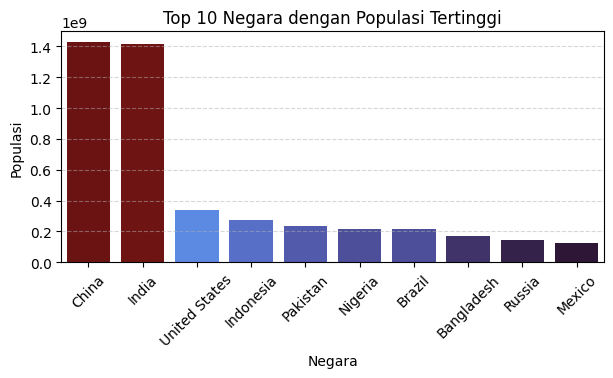

In [46]:
# Normalisasi populasi untuk membuat gradasi warna
norm = mcolors.Normalize(vmin=top_pop['Population'].min(), vmax=top_pop['Population'].max())
cmap = cm.get_cmap('turbo')
colors = [cmap(norm(value)) for value in top_pop['Population']]

# Visualisasi barplot horizontal
plt.style.use("default")
plt.figure(figsize=(7, 3))
bars = sns.barplot(
    data=top_pop,
    x='Country',
    y='Population',
    palette=colors
)

plt.title('Top 10 Negara dengan Populasi Tertinggi')
plt.xlabel('Negara')
plt.ylabel('Populasi')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

**Insights:**
- China dan India sejak tahun 1970 sampai 2022 secara konsisten menjadi negara dengan tingkat populasi tertinggi di dunia
- Berdasarkan data tahun 2022, China dan India merupakan negara dengan tingkat populasi tertinggi di dunia dengan persentase masing-masing 17,88% dan 17,77%. Dengan jumlah populasi masing-masing sebanyak 1.425.887.337 miliar jiwa dan 1.417.173.173 miliar jiwa

2. Bagaimana pertumbuhan penduduk di setiap negara?

In [30]:
fig = px.choropleth(data_wp,
                     locations='country/territory',
                     locationmode='country names',
                     color='growth_rate',
                     color_continuous_scale='turbo',
                     title = 'Tingkat Pertumbuhan')

fig.show()

5 Negara dengan Growth Rate Tertinggi:
    country/territory  growth_rate
133           Moldova       1.0691
164            Poland       1.0404
148             Niger       1.0378
202             Syria       1.0376
189          Slovakia       1.0359

5 Negara dengan Growth Rate Terendah:
    country/territory  growth_rate
218           Ukraine       0.9120
112           Lebanon       0.9816
3      American Samoa       0.9831
30           Bulgaria       0.9849
117         Lithuania       0.9869


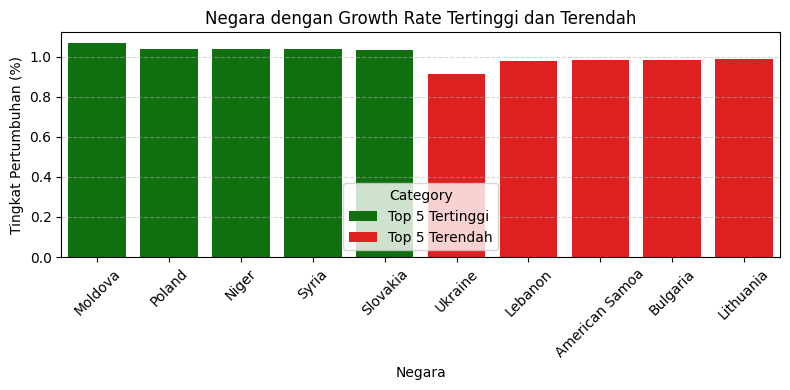

In [33]:
# Ambil 5 negara dengan growth rate tertinggi
top_growth = data_wp[['country/territory', 'growth_rate']].sort_values(by='growth_rate', ascending=False).head(5)
top_growth['Category'] = 'Top 5 Tertinggi'

# Ambil 5 negara dengan growth rate terendah
bottom_growth = data_wp[['country/territory', 'growth_rate']].sort_values(by='growth_rate', ascending=True).head(5)
bottom_growth['Category'] = 'Top 5 Terendah'

# Gabungkan keduanya
combined_growth = pd.concat([top_growth, bottom_growth], ignore_index=True)
combined_growth.columns = ['Country/Territory', 'Growth Rate', 'Category']

# Tampilkan hasil
print("5 Negara dengan Growth Rate Tertinggi:")
print(top_growth[['country/territory', 'growth_rate']])

print("\n5 Negara dengan Growth Rate Terendah:")
print(bottom_growth[['country/territory', 'growth_rate']])

# Visualisasi
plt.figure(figsize=(8, 4))
sns.barplot(data=combined_growth,
            x='Country/Territory',
            y='Growth Rate',
            hue='Category',
            dodge=False,
            palette={'Top 5 Tertinggi': 'green', 'Top 5 Terendah': 'red'})

plt.title('Negara dengan Growth Rate Tertinggi dan Terendah')
plt.xlabel('Negara')
plt.ylabel('Tingkat Pertumbuhan (%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insights:**
- Tingkat pertumbuhan penduduk **tertinggi** berada di negara Moldova di angka 1.0691 dan tingkat pertumbuhan penduduk **terendah** berada di negara Ukraina di angka 0.9120

3. Bagaimana tren pertumbuhan penduduk dari tahun ke tahun di setiap benua?

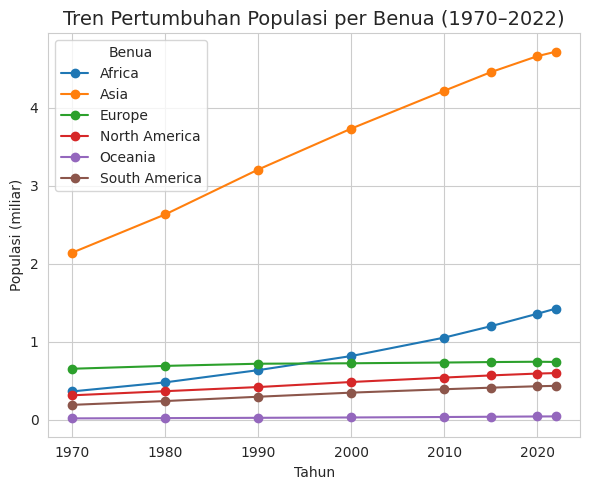

In [36]:
# Ubah kolom populasi ke numerik
tahun = ['1970_population', '1980_population', '1990_population', '2000_population', '2010_population', '2015_population', '2020_population', '2022_population']
data_wp[tahun] = data_wp[tahun].apply(pd.to_numeric, errors='coerce')

# Ubah format wide ke long agar mudah divisualisasikan
data_wp_melted = data_wp.melt(id_vars=['continent'],
                    value_vars=tahun,
                    var_name='Year',
                    value_name='Population')

# Ubah label tahun jadi numerik
data_wp_melted['Year'] = data_wp_melted['Year'].str.extract(r'(\d+)').astype(int)

# Agregasi jumlah populasi per tahun dan per benua
data_wp_grouped = data_wp_melted.groupby(['continent', 'Year'])['Population'].sum().reset_index()

# Visualisasi tren
plt.figure(figsize=(6, 5))
sns.set_style('whitegrid')
for continent in data_wp_grouped['continent'].unique():
    data = data_wp_grouped[data_wp_grouped['continent'] == continent]
    plt.plot(data['Year'], data['Population']/1e9, marker='o', label=continent)

plt.title('Tren Pertumbuhan Populasi per Benua (1970–2022)', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Populasi (miliar)')
plt.legend(title='Benua')
plt.tight_layout()
plt.show()

Rata-rata Growth Rate per Benua:


,Continent,Average Growth Rate
0,Africa,58.2109
1,Asia,50.4692
2,Europe,50.1128
3,North America,40.1670
4,Oceania,23.1698
5,South America,14.1114


/tmp/ipython-input-55-276137233.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




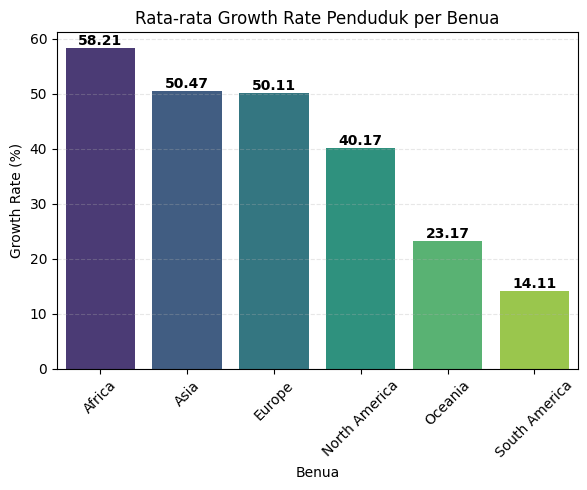

In [55]:
# Hitung rata-rata growth rate per benua
continent_growth = data_wp.groupby('continent')['growth_rate'].sum().reset_index()

# Ubah nama kolom jadi rapi
continent_growth.columns = ['Continent', 'Average Growth Rate']

# Tampilkan tabel
print("Rata-rata Growth Rate per Benua:")
display(continent_growth)

# Visualisasi
plt.figure(figsize=(6, 5))
sns.barplot(data=continent_growth, x='Continent', y='Average Growth Rate', palette='viridis')

# Tambahkan label di atas bar
for i, row in continent_growth.iterrows():
    plt.text(i, row['Average Growth Rate'] + 0.01, f"{row['Average Growth Rate']:.2f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Styling
plt.title('Rata-rata Growth Rate Penduduk per Benua')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Benua')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Insights:**
- Benua Asia memiliki tingkat populasi tertinggi dalam setiap tahun dan benua Oceanic memiliki tingkat populasi terendah dalam setiap tahun
- Benua Eropa memiliki tingkat populasi yang cenderung stabil
- Benua Afrika memiliki peningkatan populasi tertinggi dibandingkan dengan benua lain

# Recommendations
1. Untuk Negara dengan Populasi Sangat Besar (China & India)
 - Kembangkan kebijakan urbanisasi dan pembangunan infrastruktur
 - Pengendalian pertumbuhan dan perencanaan keluarga untuk menjaga keseimbangan antara pertumbuhan ekonomi
2. Untuk Negara dengan Pertumbuhan Tertinggi dan Terendah (Moldova & Ukraina)
 - Moldova (pertumbuhan tertinggi): Perlu investasi dalam pendidikan, kesehatan, penciptaan lapangan kerja dan pelatihan tenaga kerja agar pertumbuhan penduduk tidak menjadi beban sosial.
 - Ukraina (pertumbuhan terendah): Perlu strategi untuk mengatasi penurunan populasi seperti subsidi anak, insentif pernikahan, atau kebijakan imigrasi positif.
3. Untuk Benua Oceania
 - Perkuat pertahanan di setiap negara terhadap migrasi.
 - Fokus pada pembangunan berkelanjutan dan pelestarian lingkungan.
4. Untuk Benua Afrika
 - Investasi besar-besaran dalam pendidikan dan kesehatan sangat penting untuk memanfaatkan bonus demografi.
 - Pembangunan infrastruktur dan industrialisasi harus dipercepat agar pertumbuhan penduduk sejalan dengan pertumbuhan ekonomi.
 - Perencanaan kota dan pengelolaan sumber daya alam untuk menghindari krisis lingkungan dan sosial.